TJ Zhang

In [1]:
from tqdm.auto import tqdm
import requests
import pandas as pd
import numpy as np
rng = np.random.RandomState(20211209)

links = pd.read_csv("ml-25m/links.csv")
linksample = links.sample(n=1000, random_state=rng)#random select 10
TMDB_KEY = "75d96e4d8e560b74c506e16ef0dbb479"
tmdb_ids = linksample["tmdbId"]
tmdb_details = []
for mid in tqdm(tmdb_ids):
    res = requests.get(f'https://api.themoviedb.org/3/movie/{mid}',
                        params={'api_key': TMDB_KEY})
    tmdb_details.append(res.json())

# from pandas.io.json import json_normalize
# json_normalize

  0%|          | 0/1000 [00:00<?, ?it/s]

In [2]:
linksample

,movieId,imdbId,tmdbId
28121,130968,85320,149926.0
30936,137365,79135,29562.0
49272,178527,4579914,412361.0
57502,196497,99860,284713.0
58270,198255,7694738,497796.0
...,...,...,...
18801,98122,1942884,80215.0
41387,161582,2582782,338766.0
45732,170993,425253,15314.0
8618,26157,60666,22293.0


In [3]:
tmdb_details

[{'adult': False,
  'backdrop_path': '/oye1k8ZKtG5NIk73wzU8ty7ml6K.jpg',
  'belongs_to_collection': None,
  'budget': 0,
  'genres': [{'id': 18, 'name': 'Drama'}],
  'homepage': '',
  'id': 149926,
  'imdb_id': 'tt0085320',
  'original_language': 'en',
  'original_title': 'Champions',
  'overview': 'The true story of jockey Bob Champion who overcame cancer to win the 1981 Grand National',
  'popularity': 3.837,
  'poster_path': '/dvwstpp4znhQYjZf9lRDIbUmXjd.jpg',
  'production_companies': [{'id': 8845,
    'logo_path': None,
    'name': 'Ladbroke',
    'origin_country': ''},
   {'id': 26373,
    'logo_path': None,
    'name': 'United British Artists (UBA)',
    'origin_country': ''}],
  'production_countries': [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}],
  'release_date': '1984-04-20',
  'revenue': 0,
  'runtime': 106,
  'spoken_languages': [{'english_name': 'English',
    'iso_639_1': 'en',
    'name': 'English'}],
  'status': 'Released',
  'tagline': '',
  'title': 'Champions',


In [25]:
v=[]
movies=pd.DataFrame(v)
tmdb_elements=['id']
for tmdb_element in tmdb_elements:
    for i in tmdb_details:
        if tmdb_element in i:
            v.append(i[tmdb_element])
        else:
            v.append(np.nan)
       
        tmdb_data=pd.DataFrame({'tmdbId':v})
  

In [26]:
tmdb_data

,tmdbId
0,149926.0
1,29562.0
2,412361.0
3,284713.0
4,497796.0
...,...
995,80215.0
996,338766.0
997,15314.0
998,22293.0


In [37]:
v=[]
movies=pd.DataFrame(v)
tmdb_elements=['production_countries']
for tmdb_element in tmdb_elements:
    for i in tmdb_details:
        if tmdb_element in i:
            if i[tmdb_element]:

                v.append(i[tmdb_element][0]['name'])
                tmdb_data['production_countries']=pd.DataFrame(v)
            else:
                tmdb_data['production_countries']=np.nan
        else:
            tmdb_data['production_countries']=np.nan
    tmdb_data['production_countries']=pd.DataFrame(v)
    v=[]

In [38]:
tmdb_data

,tmdbId,production_countries
0,149926.0,United Kingdom
1,29562.0,France
2,412361.0,Canada
3,284713.0,Russia
4,497796.0,United States of America
...,...,...
995,80215.0,NaN
996,338766.0,NaN
997,15314.0,NaN
998,22293.0,NaN


In [39]:
v=[]
movies=pd.DataFrame(v)
tmdb_elements=['imdb_id','budget','original_language','popularity','release_date',
              'revenue','runtime','vote_average','vote_count']
for tmdb_element in tmdb_elements:
    for i in tmdb_details:
        if tmdb_element in i:
            v.append(i[tmdb_element])
        else:
            v.append(np.nan)
    tmdb_data[tmdb_element]=pd.DataFrame(v)
    v=[]
tmdb_data

,tmdbId,production_countries,imdb_id,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,149926.0,United Kingdom,tt0085320,0.0,en,Champions,3.837,1984-04-20,0.0,106.0,7.0,12.0
1,29562.0,France,tt0079135,0.0,fr,Fascination,4.254,1979-11-01,0.0,80.0,6.2,58.0
2,412361.0,Canada,tt4579914,0.0,fr,Nitro Rush,9.436,2016-08-31,0.0,96.0,5.8,19.0
3,284713.0,Russia,tt0099860,0.0,ru,Искушение Б.,1.290,1991-07-01,0.0,84.0,6.0,8.0
4,497796.0,United States of America,tt7694738,0.0,en,Best F(r)iends: Volume 2,6.180,2018-06-01,0.0,93.0,5.2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,80215.0,NaN,tt1942884,0.0,en,Indie Game: The Movie,10.282,2012-05-18,0.0,103.0,7.6,359.0
996,338766.0,NaN,tt2582782,12000000.0,en,Hell or High Water,20.619,2016-08-12,37589296.0,102.0,7.3,3542.0
997,15314.0,NaN,tt0425253,0.0,en,Mini's First Time,7.261,2006-07-14,0.0,91.0,5.8,86.0
998,22293.0,NaN,tt0060666,19000.0,en,Manos: The Hands of Fate,6.142,1966-11-15,0.0,70.0,2.0,152.0


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>, <AxesSubplot:>]],
      dtype=object)

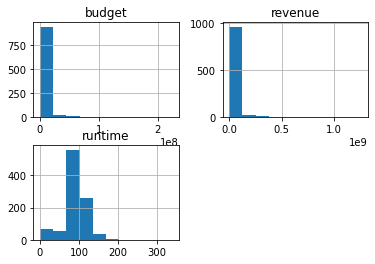

In [43]:
tmdb_data[['budget','revenue','runtime']].hist()

In [ ]:
# genome_tags=pd.read_csv('ml-25m/genome-tags.csv')
# genome_tags.head()

In [ ]:
# movielen=genome_scores.merge(genome_tags,on='tagId')
# movielen

In [44]:
link=pd.read_csv('ml-25m/links.csv')
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [45]:
# movielen=genome_scores.merge(link,on='movieId')
# movielen

In [46]:
movie=pd.read_csv('ml-25m/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
movielen=link.merge(movie,on='movieId')

In [48]:
rating=pd.read_csv('ml-25m/ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [49]:
# movielen_mean_rating=rating.groupby('movieId')['rating'].mean()
# rating.groupby('movieId')['rating'].count()

In [50]:
movielen_rating_count=pd.DataFrame(rating.groupby('movieId')
                                   ['rating'].count()).reset_index().rename(columns={'rating':'rating_counts'})
movielen_mean_rating=pd.DataFrame(rating.groupby('movieId')
                                  ['rating'].mean()).reset_index().rename(columns={'rating':'rating_mean'})

In [51]:
movielen=movielen.merge(movielen_mean_rating,on='movieId')

In [52]:
# tag=pd.read_csv('ml-25m/tags.csv')
# tag.head(20)
movielen=movielen.merge(movielen_rating_count,on='movieId')

In [53]:
# movielen=movielen.merge(tag,on='movieId')

In [54]:
movielen

,movieId,imdbId,tmdbId,title,genres,rating_mean,rating_counts
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy,3.058434,11714
...,...,...,...,...,...,...,...
59042,209157,6671244,499546.0,We (2018),Drama,1.500000,1
59043,209159,297986,63407.0,Window of the Soul (2001),Documentary,3.000000,1
59044,209163,6755366,553036.0,Bad Poems (2018),Comedy|Drama,4.500000,1
59045,209169,249603,162892.0,A Girl Thing (2001),(no genres listed),3.000000,1


In [69]:
movielen.drop(['title','genres'],axis=1)

,movieId,imdbId,tmdbId,rating_mean,rating_counts
0,1,114709,862.0,3.893708,57309
1,2,113497,8844.0,3.251527,24228
2,3,113228,15602.0,3.142028,11804
3,4,114885,31357.0,2.853547,2523
4,5,113041,11862.0,3.058434,11714
...,...,...,...,...,...
59042,209157,6671244,499546.0,1.500000,1
59043,209159,297986,63407.0,3.000000,1
59044,209163,6755366,553036.0,4.500000,1
59045,209169,249603,162892.0,3.000000,1


In [55]:
# import os
# os.system(python .py)

In [56]:
movies=movielen.merge(tmdb_data,on='tmdbId')
movies

,movieId,imdbId,tmdbId,title,genres,rating_mean,rating_counts,production_countries,imdb_id,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,36,112818,687.0,Dead Man Walking (1995),Crime|Drama,3.918687,19388,United Kingdom,tt0112818,11000000.0,en,Dead Man Walking,9.667,1995-12-29,39363635.0,122.0,7.4,996.0
1,137,113756,5757.0,Man of the Year (1995),Documentary,3.254854,206,France,tt0113756,0.0,en,Man of the Year,0.840,1995-09-15,209935.0,86.0,3.2,3.0
2,265,103994,18183.0,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,3.921668,10781,United States of America,tt0103994,2000000.0,es,Como agua para chocolate,9.464,1992-04-16,21744201.0,105.0,7.2,347.0
3,303,114214,12106.0,"Quick and the Dead, The (1995)",Action|Thriller|Western,3.043249,6532,Italy,tt0114214,32000000.0,en,The Quick and the Dead,15.923,1995-02-09,18636537.0,107.0,6.5,1243.0
4,305,110907,3586.0,Ready to Wear (Pret-A-Porter) (1994),Comedy,2.710306,3105,United States of America,tt0110907,15000000.0,en,Prêt-à-Porter,6.805,1994-12-23,11300653.0,133.0,5.3,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,207618,138434,133007.0,Os Fantasmas Trapalhões (1987),Children|Comedy,3.000000,1,Spain,tt0138434,0.0,pt,Os Fantasmas Trapalhões,4.814,1987-09-11,0.0,90.0,4.8,25.0
2146,207640,9617506,576561.0,Vision Portraits (2019),Documentary,4.500000,1,France,tt9617506,0.0,en,Vision Portraits,1.132,2019-03-09,0.0,78.0,7.0,1.0
2147,208030,997093,164152.0,Dog in a Sidecar (2007),Drama,3.500000,1,NaN,tt0997093,0.0,ja,サイドカーに犬,1.400,2007-06-23,0.0,94.0,6.3,4.0
2148,209057,489278,428702.0,The Somme (2005),Drama,3.000000,1,United States of America,tt0489278,0.0,en,The Somme,3.574,2005-11-14,0.0,102.0,6.0,4.0


In [57]:
imdb_data=pd.read_csv('title.crew.tsv',sep='\t')

In [58]:
imdb_data

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
8499811,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8499812,tt9916850,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
8499813,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
8499814,tt9916856,nm10538645,nm6951431


In [59]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499816 entries, 0 to 8499815
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 194.5+ MB


In [60]:
imdb=imdb_data
imdb['if_have_writers']=0
imdb['writers'].astype('str')
imdb.count()

tconst             8499816
directors          8499816
writers            8499816
if_have_writers    8499816
dtype: int64

In [61]:
imdb['writers'][0]=='\\N'

True

In [62]:
# imdb['writers'][0]==np.nan

In [63]:
imdb.loc[imdb['writers']!='\\N','if_have_writers']=1

In [64]:
type(imdb['writers'][8499811])

str

In [70]:
imdb=imdb.rename(columns={'tconst':'imdb_id'})
imdb
imdb=imdb.drop(['directors','writers'],axis=1)
imdb

,imdb_id,if_have_writers
0,tt0000001,0
1,tt0000002,0
2,tt0000003,0
3,tt0000004,0
4,tt0000005,0
...,...,...
8499811,tt9916848,1
8499812,tt9916850,1
8499813,tt9916852,1
8499814,tt9916856,1


<AxesSubplot:>

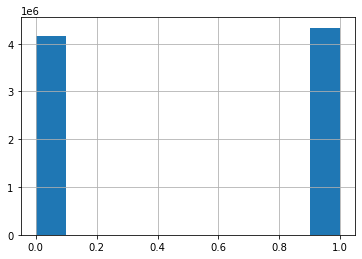

In [66]:
imdb['if_have_writers'].hist()

In [67]:
movies=movies.merge(imdb,on='imdb_id')
movies

,movieId,imdbId,tmdbId,title,genres,rating_mean,rating_counts,production_countries,imdb_id,budget,...,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,directors,writers,if_have_writers
0,36,112818,687.0,Dead Man Walking (1995),Crime|Drama,3.918687,19388,United Kingdom,tt0112818,11000000.0,...,Dead Man Walking,9.667,1995-12-29,39363635.0,122.0,7.4,996.0,nm0000209,"nm0695878,nm0000209",1
1,137,113756,5757.0,Man of the Year (1995),Documentary,3.254854,206,France,tt0113756,0.0,...,Man of the Year,0.840,1995-09-15,209935.0,86.0,3.2,3.0,nm0787257,nm0787257,1
2,265,103994,18183.0,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,3.921668,10781,United States of America,tt0103994,2000000.0,...,Como agua para chocolate,9.464,1992-04-16,21744201.0,105.0,7.2,347.0,nm0000778,nm0261294,1
3,303,114214,12106.0,"Quick and the Dead, The (1995)",Action|Thriller|Western,3.043249,6532,Italy,tt0114214,32000000.0,...,The Quick and the Dead,15.923,1995-02-09,18636537.0,107.0,6.5,1243.0,nm0000600,nm0601881,1
4,305,110907,3586.0,Ready to Wear (Pret-A-Porter) (1994),Comedy,2.710306,3105,United States of America,tt0110907,15000000.0,...,Prêt-à-Porter,6.805,1994-12-23,11300653.0,133.0,5.3,143.0,nm0000265,"nm0000265,nm0795694",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,207618,138434,133007.0,Os Fantasmas Trapalhões (1987),Children|Comedy,3.000000,1,Spain,tt0138434,0.0,...,Os Fantasmas Trapalhões,4.814,1987-09-11,0.0,90.0,4.8,25.0,nm0849544,"nm0032787,nm0218189,nm0849544",1
922,207640,9617506,576561.0,Vision Portraits (2019),Documentary,4.500000,1,France,tt9617506,0.0,...,Vision Portraits,1.132,2019-03-09,0.0,78.0,7.0,1.0,nm0263179,nm0263179,1
923,208030,997093,164152.0,Dog in a Sidecar (2007),Drama,3.500000,1,NaN,tt0997093,0.0,...,サイドカーに犬,1.400,2007-06-23,0.0,94.0,6.3,4.0,nm0624377,"nm2604399,nm1646569,nm0541239",1
924,209057,489278,428702.0,The Somme (2005),Drama,3.000000,1,United States of America,tt0489278,0.0,...,The Somme,3.574,2005-11-14,0.0,102.0,6.0,4.0,nm0385565,"nm1597802,nm0385565",1


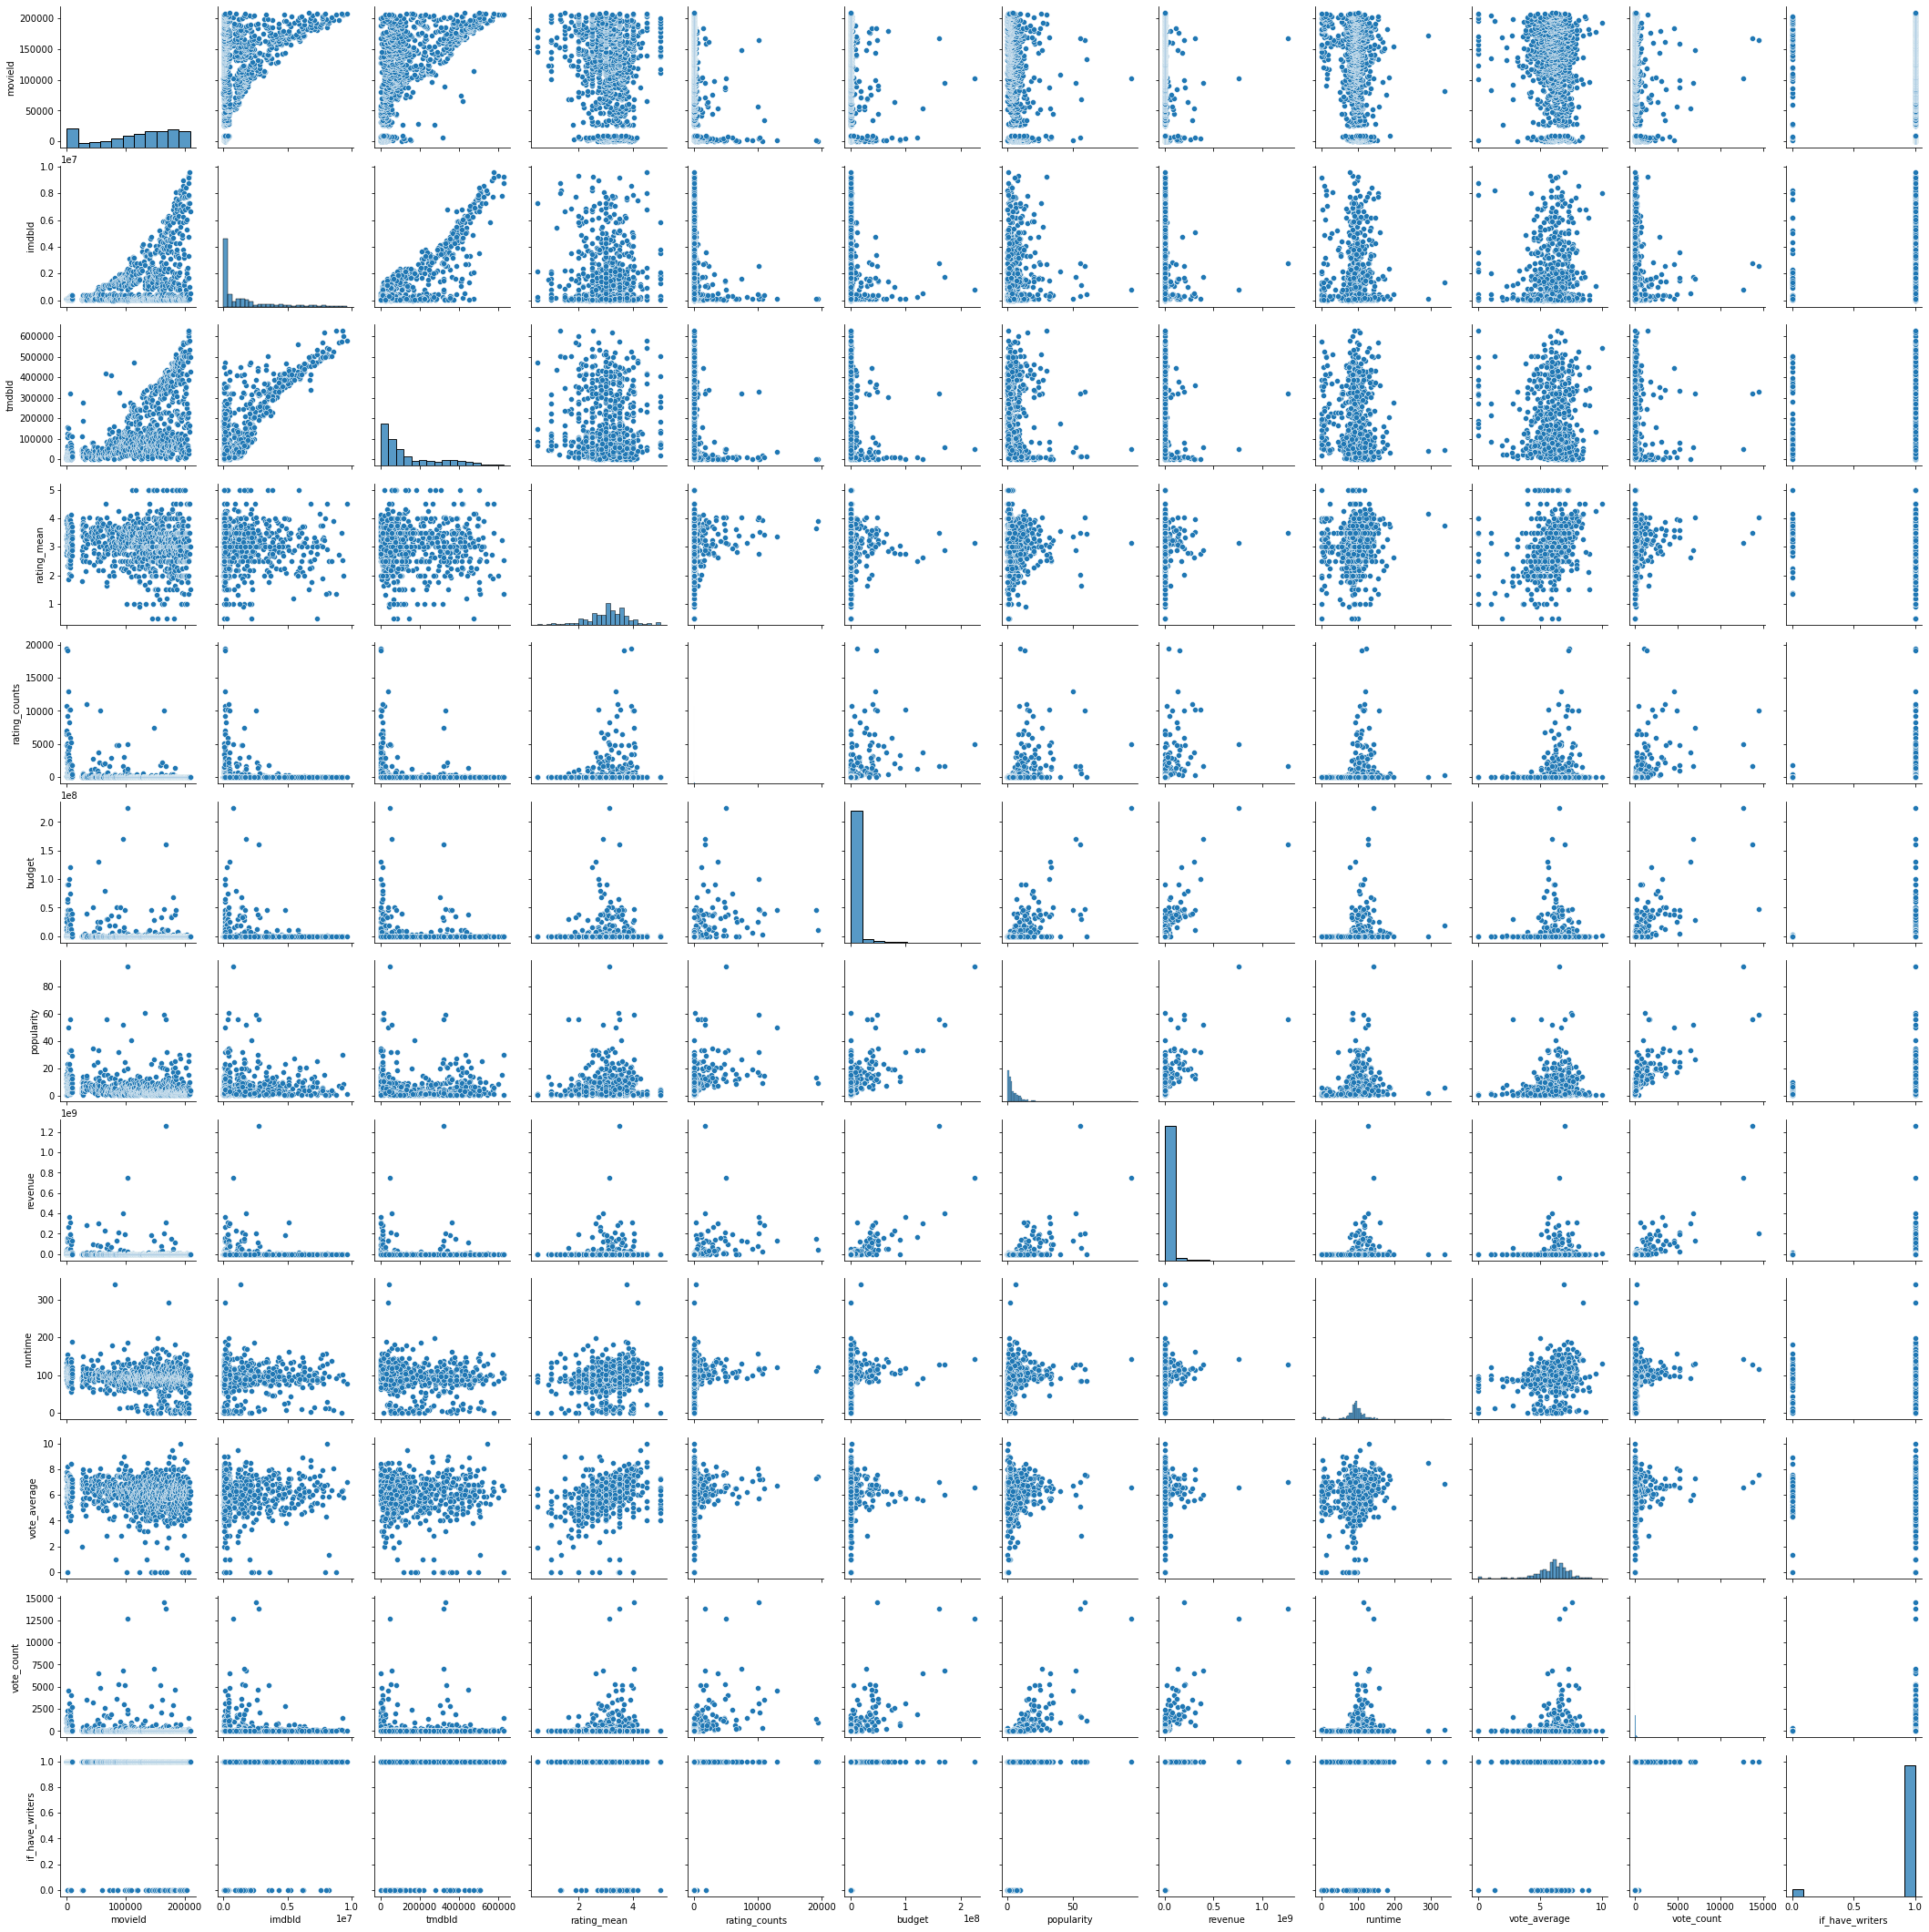

In [68]:
import seaborn as sns
sns.pairplot(movies)